(rasch-model-notebook)=
# Modello di Rasch 

In [1]:
source("../_common.R")

suppressPackageStartupMessages({
    library("tidyverse")
    library("ltm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("latex2exp")
    })

## Introduzione alla Teoria della Risposta all'Item

La psicometria, disciplina focalizzata sulla misurazione quantitativa delle abilità, atteggiamenti e tratti psicologici, ha subìto un'evoluzione significativa grazie all'emergere della Teoria della Risposta all'Item (IRT). Questo modello si distingue per la sua capacità di affrontare e conceptualizzare gli errori di misurazione in modo più efficace rispetto alla CTT. In questo capitolo, esploreremo le basi dell'IRT.

L'IRT rappresenta un cambiamento paradigmatico nella misurazione psicometrica. A differenza della CTT, che si concentra sul punteggio totale di un test, l'IRT si focalizza sulle risposte ai singoli item, permettendo un'analisi più dettagliata e accurata delle capacità di un individuo. L'essenza dell'IRT sta nella sua capacità di modellare la probabilità che un individuo risponda correttamente a un item specifico, basandosi sulle caratteristiche dell'item e sul livello di abilità dell'individuo.

Uno degli aspetti distintivi dell'IRT è la sua applicabilità alle risposte categoriali, comuni nei test psicometrici, dove gli individui selezionano risposte da un insieme di categorie predefinite.

L'IRT trova applicazione in una vasta gamma di contesti. È fondamentale nello sviluppo di test standardizzati, nella valutazione della qualità degli item di un test, e nella costruzione di punteggi compositi basati su risposte a più item. Inoltre, l'IRT è impiegata per sviluppare strumenti di valutazione più validi, offrendo una migliore comprensione delle abilità o tratti misurati.

L'aspetto unico dell'IRT è la sua capacità di analizzare l'interazione tra le caratteristiche degli item e le abilità degli individui. Questo permette una comprensione più approfondita di come diversi tipi di item influenzino le risposte degli individui, consentendo una misurazione più accurata e personalizzata.

Nonostante i suoi numerosi vantaggi, l'implementazione dell'IRT presenta alcune sfide, come la necessità di grandi campioni di dati e la complessità nella modellizzazione statistica. Tuttavia, con l'avanzamento della tecnologia e la crescente disponibilità di dati, l'IRT continua a evolversi, offrendo nuove opportunità per affinare ulteriormente la misurazione psicometrica.

Nella seguente discussione dei modelli IRT seguiremo da vicino l'esposizione fornita da {cite:t}`debelak2022introduction` a cui si rimanda per ulteriori approfondimenti.

## La scala di Guttman

Prima di esplorare i modelli IRT, è importante comprendere lo scaling di Guttman. Lo scaling di Guttman serve a stabilire una relazione tra il livello di abilità di un individuo e le sue risposte ai vari item (domande o compiti) di un test. Cercherò di spiegare questo concetto in modo più chiaro e dettagliato. Nello scaling di Guttman si assume che vi sia una gerarchia definita nella difficoltà degli item di un test. Questa gerarchia è strettamente collegata alle abilità delle persone che svolgono il test. L'idea fondamentale è che una persona con un certo livello di abilità sia in grado di rispondere correttamente a tutti gli item che sono al suo livello di abilità o al di sotto, ma non a quelli che sono più difficili.

La Scala di Guttman viene rappresentata graficamente in un modo che mostra la relazione tra la probabilità di rispondere correttamente a un item e il livello di abilità del rispondente. Questa rappresentazione grafica è realizzata attraverso le cosiddette *curve caratteristiche degli item* (ICC). Le ICC illustrano la probabilità che un individuo risponda correttamente a un determinato item, in base al suo livello di abilità.

Nel grafico della Scala di Guttman:

- L'asse verticale rappresenta la probabilità di rispondere correttamente a un item. Secondo Guttman, questa probabilità è binaria: un individuo o risponde correttamente a un item (probabilità = 1.0) o non lo fa (probabilità = 0).
- L'asse orizzontale, invece, rappresenta il livello di abilità delle persone che affrontano il test.

Le cinque frecce nel grafico in basso indicano cinque persone con diversi livelli di abilità. Ogni freccia mostra il punto in cui l'abilità di una persona interseca le varie curve caratteristiche degli item. In un test ideale basato sulla Scala di Guttman, ogni persona dovrebbe essere in grado di rispondere correttamente a tutti gli item a sinistra della sua posizione sul grafico (ovvero, quelli meno difficili) e non riuscire a rispondere a quelli a destra (più difficili).

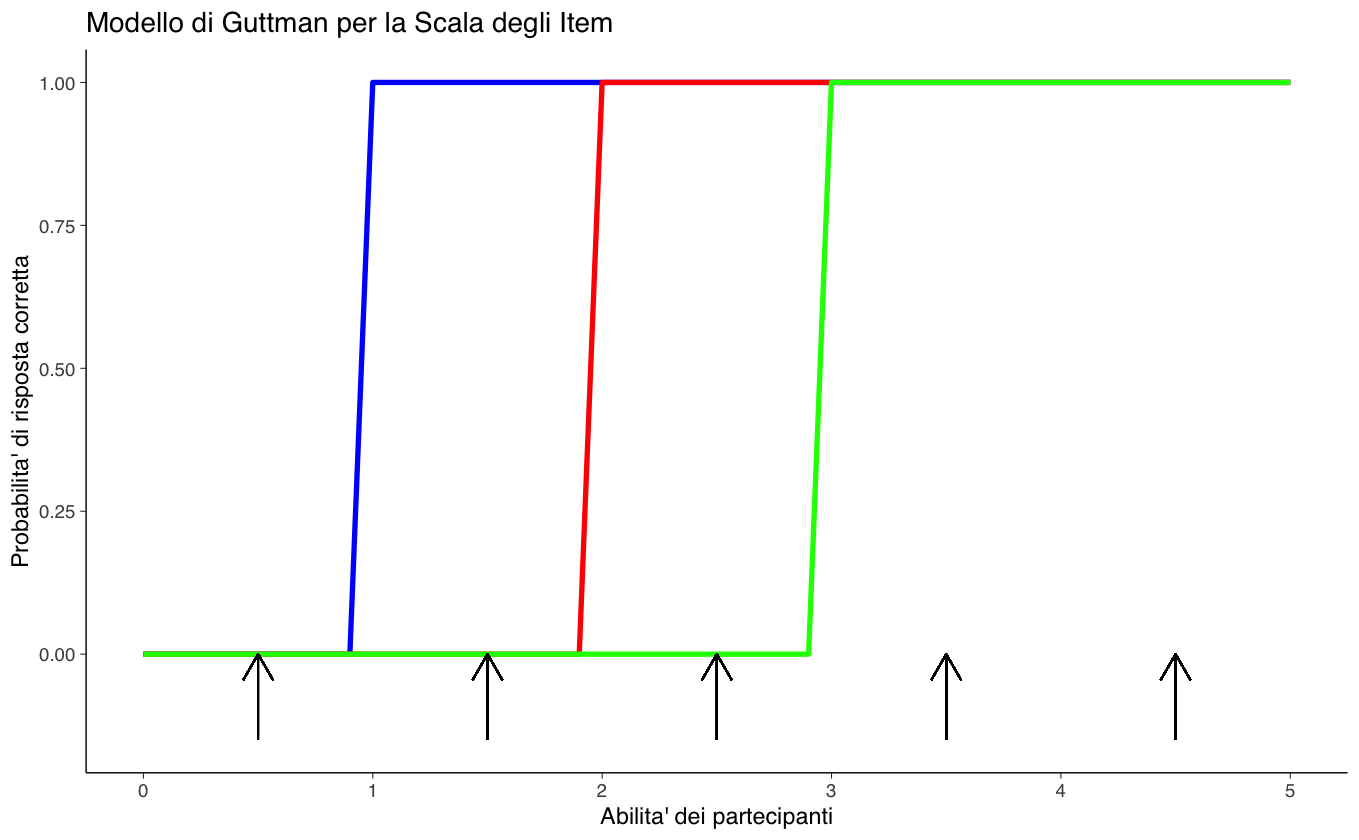

In [2]:
abilita <- seq(0, 5, by = 0.1)
difficolta_item_1 <- 1
difficolta_item_2 <- 2
difficolta_item_3 <- 3
probabilita_item_1 <- as.numeric(abilita >= difficolta_item_1)
probabilita_item_2 <- as.numeric(abilita >= difficolta_item_2)
probabilita_item_3 <- as.numeric(abilita >= difficolta_item_3)
data <- data.frame(abilita, probabilita_item_1, probabilita_item_2, probabilita_item_3)

p <- ggplot(data, aes(x = abilita)) +
    geom_line(aes(y = probabilita_item_1), color = "blue", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_2), color = "red", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_3), color = "green", linewidth = 1.5) +
    labs(
        x = "Abilita' dei partecipanti", y = "Probabilita' di risposta corretta",
        title = "Modello di Guttman per la Scala degli Item"
    ) 

y_posizione_frecce <- -0.15 

p <- p + geom_segment(aes(x = 0.5, y = y_posizione_frecce, xend = 0.5, yend = 0), arrow = arrow(), color = "black") # Persona con bassa abilità
p <- p + geom_segment(aes(x = 1.5, y = y_posizione_frecce, xend = 1.5, yend = 0), arrow = arrow(), color = "black") # Seconda persona
p <- p + geom_segment(aes(x = 2.5, y = y_posizione_frecce, xend = 2.5, yend = 0), arrow = arrow(), color = "black") # Terza persona
p <- p + geom_segment(aes(x = 3.5, y = y_posizione_frecce, xend = 3.5, yend = 0), arrow = arrow(), color = "black") # Quarta persona
p <- p + geom_segment(aes(x = 4.5, y = y_posizione_frecce, xend = 4.5, yend = 0), arrow = arrow(), color = "black") # Quinta persona

print(p)


Il modello di Guttman si basa su un'ipotesi chiave riguardante la somma dei punteggi ottenuti dai partecipanti a un test. Secondo questo modello, se un individuo risponde correttamente a un item di difficile risoluzione, è logicamente presunto che abbia anche risposto correttamente a tutti gli item precedenti, che sono considerati di difficoltà inferiore. Questo concetto implica che la capacità di rispondere a domande più difficili include implicitamente l'abilità di rispondere a quelle più semplici, rendendo il punteggio totale ottenuto in un test un indicatore affidabile dell'abilità complessiva della persona.

Tuttavia, il modello di Guttman non è esente da limitazioni. Una delle critiche principali è che raramente si osservano scale di Guttman pure nella pratica. In altre parole, non è sempre vero che i test seguano un andamento così rigido e prevedibile come quello proposto da Guttman. Nella realtà, la probabilità di rispondere correttamente a un item non sempre aumenta bruscamente da 0 a 1 al raggiungimento di una certa soglia di abilità. Piuttosto, questa probabilità può variare in modo più graduale, spesso descritta da una funzione sigmoidale.

Inoltre, è importante considerare che le curve caratteristiche degli item (ICC) possono variare nella loro ripidità per i diversi item di un test. Ciò significa che alcuni item potrebbero mostrare un cambiamento più marcato nella probabilità di risposta corretta al variare dell'abilità, mentre altri potrebbero mostrare un cambiamento più graduale. Questa variabilità delle ICC riflette la complessità e la diversità delle abilità umane e delle modalità con cui queste si manifestano in contesti di test.

In sintesi, il modello di Guttman fornisce un quadro utile per comprendere la relazione tra abilità e performance in un test, ma è importante riconoscerne le limitazioni e comprendere che nella realtà psicometrica, le relazioni tra abilità, difficoltà dell'item e probabilità di risposta corretta possono essere più complesse e meno prevedibili di quanto il modello di Guttman suggerisca.

## Il Modello di Rasch

Continuando la discussione sulle teorie psicometriche, esaminiamo ora il modello di Rasch, che può essere visto come un'evoluzione o un superamento dei limiti dello scaling di Guttman.

Il modello di Rasch offre un approccio diverso per misurare le competenze, come quelle matematiche, in un gruppo di individui. Nella psicometria, la competenza matematica è considerata una variabile latente, ossia una caratteristica non direttamente osservabile ma inferibile attraverso comportamenti misurabili. Questa variabile è concepita come un continuum latente. Supponiamo di somministrare un test di matematica contenente cinque item per valutare le competenze matematiche degli individui. Le risposte fornite costituiscono le nostre osservazioni comportamentali.

Nel modello di Rasch, sia la difficoltà degli item di un test che le abilità dei rispondenti sono rappresentate sullo stesso continuum. L'estremità superiore di questo continuum indica una maggiore competenza matematica rispetto all'estremità inferiore. Gli item quindi sono posizionati lungo questo continuum a seconda della loro difficoltà, con alcuni item che richiedono maggior competenza per essere risolti correttamente. Ad esempio, gli item possono essere posizionati a diversi punti lungo il continuum, come -2, -1, e così via. Utilizzando la notazione greca, $\beta$ rappresenta la posizione di un item sul continuum, con $\beta_i$ indicante la posizione dell'i-esimo item.

Similmente, la posizione di un individuo sul continuum, indicata con $\theta$, riflette la sua competenza matematica. La collocazione di persone e item sullo stesso continuum permette di fare affermazioni comparative su come una persona tipica potrebbe rispondere a un determinato item. Per esempio, è più probabile che un individuo situato nella posizione 0 sul continuum risponda correttamente agli item situati nell'estremità inferiore del continuum (come l'item con $\beta_1$ = -2). Tuttavia, per un item posizionato vicino allo 0, come l'item 2 con $\beta_2$ = -1, la probabilità di una risposta corretta diminuisce, sebbene rimanga ancora significativa.

Inoltre, somministrare un item di difficoltà maggiore, come l'item 4 con $\beta_4$ = 1, a una persona situata a 0 sul continuum, probabilmente porterà a una risposta errata, ma vi è ancora una possibilità ragionevole di una risposta corretta data la vicinanza nella competenza richiesta dall'item e quella posseduta dall'individuo. In altre parole, più la distanza tra le posizioni di una persona e di un item è ampia, maggiore è la certezza sulla risposta attesa. Tuttavia, quando questa distanza si avvicina a zero, aumenta la probabilità che la risposta possa essere corretta o errata in modo quasi equiprobabile. Di conseguenza, le aspettative su come una persona risponderà a un item sono espresse in termini probabilistici, offrendo una visione più sfumata e realistica delle abilità e delle competenze.

Proseguendo la nostra discussione sul modello di Rasch, è essenziale considerare come l'idea che la probabilità di fornire una risposta corretta aumenti con il posizionamento di una persona su un continuum latente possa essere intuitivamente accattivante, ma necessita di convalida attraverso l'analisi di dati empirici. Per esplorare questa ipotesi, prendiamo in considerazione un set di dati reali derivanti da un test progettato per valutare le abilità matematiche dei partecipanti, in cui i soggetti hanno risposto a cinque item specifici.

Nel nostro esame, focalizziamo l'attenzione sulla proporzione di risposte corrette per ogni item, correlata al punteggio totale ottenuto nel test. Il punteggio totale, in questo contesto, funge da indicatore approssimativo, o proxy, dell'abilità latente dell'individuo. Osservando i risultati, possiamo cercare di comprendere come la competenza matematica (la variabile latente) influenzi la probabilità di rispondere correttamente ai diversi item.

L'analisi di questi dati ci permette di verificare se la teoria sottostante al modello di Rasch si manifesti nella pratica. In particolare, ci aspettiamo di vedere che gli individui con punteggi totali più alti, che presumibilmente riflettono una maggiore competenza matematica, tendano a rispondere correttamente agli item di maggiore difficoltà situati verso l'estremità superiore del continuum. Al contrario, gli individui con punteggi totali più bassi dovrebbero avere maggiori difficoltà con questi stessi item, ma una maggiore probabilità di successo con quelli situati verso l'estremità inferiore del continuum.

In [3]:
math_dat <- rio::import("../data/deAyala/Math.txt")
head(math_dat)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


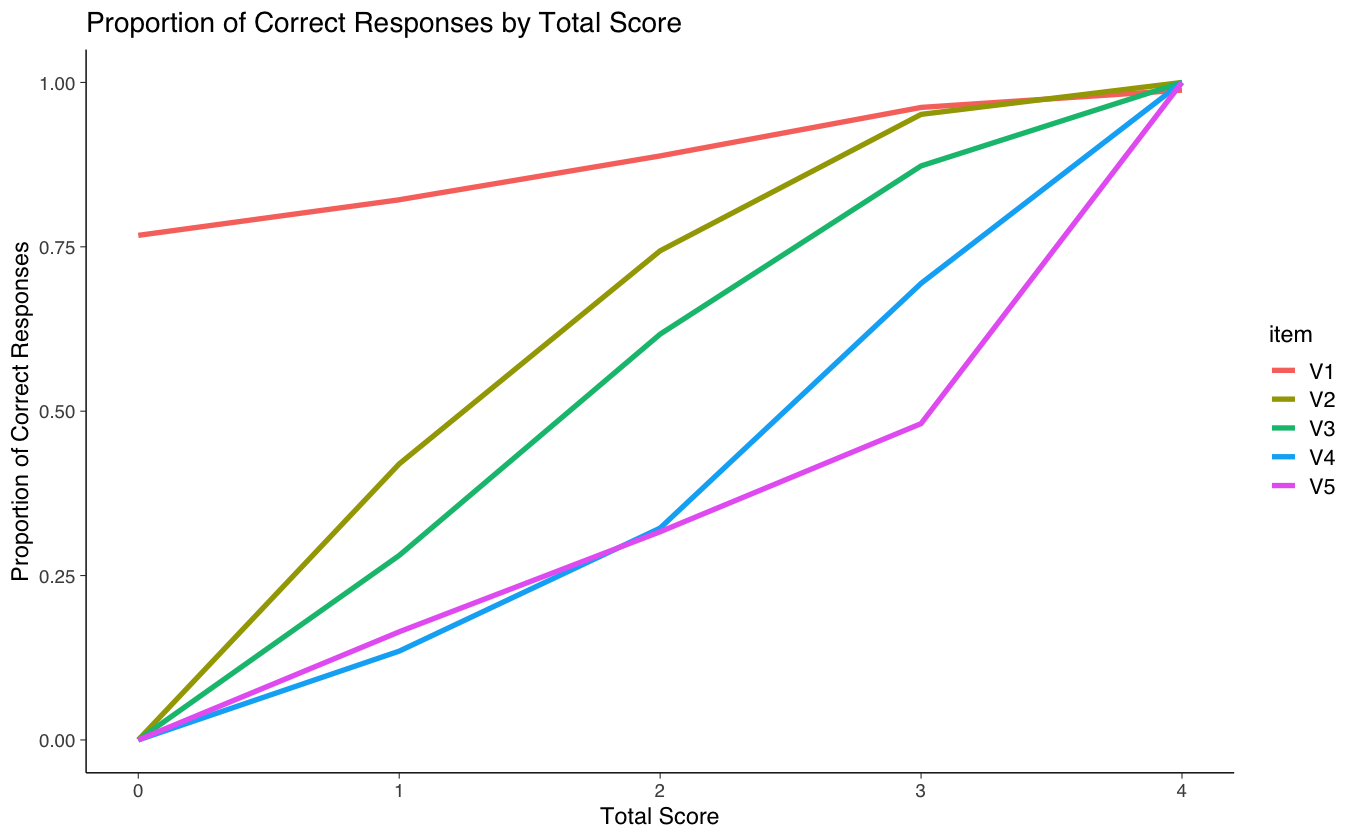

In [4]:
# Calculate the total score for each subject
math_dat$total_score <- rowSums(math_dat[, -1])

# Prepare data for plotting
plot_data <- lapply(names(math_dat)[1:5], function(item) {
    math_dat %>%
        group_by(total_score) %>%
        summarise(
            proportion = mean(get(item) == 1)
        ) %>%
        mutate(item = item)
})

plot_data <- do.call(rbind, plot_data)

# Plotting
ggplot(plot_data, aes(x = total_score, y = proportion, group = item, color = item)) +
    geom_line(linewidth = 1.5) +
    labs(
        x = "Total Score", 
        y = "Proportion of Correct Responses",
        title = "Proportion of Correct Responses by Total Score"
    ) 

Nell'esame di questo campione di dati reali, possiamo osservare come la probabilità di fornire una risposta corretta ad un item cresca all'aumentare della competenza matematica generale, rappresentata dal punteggio totale. Questo andamento conferma l'ipotesi che maggiore è l'abilità generale di un individuo, maggiori sono le sue possibilità di rispondere correttamente agli item del test.

## Curva Caratteristica dell'Item

Dopo aver osservato le tendenze nelle risposte ai vari item del test, ci possiamo porre il problema di sviluppare un modello matematico che descriva come la posizione di un individuo su un continuum latente influisce sulle sue risposte. La non linearità evidente nelle ICC empiriche della figura precedente ci suggerisce che un modello di regressione lineare non sarebbe adeguato in questo contesto. Invece, la presenza di un andamento ogivale nelle distribuzioni cumulative delle risposte, simile a quello delle distribuzioni normali cumulative o logistiche, ci porta a considerare l'uso di una di queste funzioni per la nostra modellazione. Scegliamo la funzione logistica per la sua semplicità, il che ci permette di definire la cosiddetta "curva caratteristica dell'item".

Questa curva è un raffinamento del modello di Guttman. Nel modello rappresentato dall'ICC, la probabilità di rispondere correttamente a un item non mostra un salto improvviso da 0 a 1 al superamento di una specifica soglia di abilità, ma cambia in modo più graduale, seguendo una curva sigmoidale. Questo approccio offre una rappresentazione più realistica del processo di risposta.

A differenza dello scaling di Guttman, la IRT fornisce un modello statistico per descrivere l'ICC. All'interno dell'IRT, il modello di Rasch si distingue per la sua semplicità. Il modello di Rasch assume che tutte le curve caratteristiche degli item siano parallele e abbiano la stessa inclinazione. Di conseguenza, il modello di Rasch implica che la difficoltà di ciascun item sia l'unica variabile che influisce sulla forma della curva. Ciò fornisce una rappresentazione chiara di come la probabilità di una risposta corretta varia in relazione all'abilità latente del rispondente.

La figura successiva illustra le ICC per i cinque item analizzati, seguendo il modello di Rasch. L'asse orizzontale rappresenta l'abilità latente, $\theta$, dei rispondenti, mentre l'asse verticale indica la probabilità di una risposta corretta. Ogni curva sigmoidale, rappresentata con un colore diverso, corrisponde a uno degli item del test. Si noti che queste curve sono parallele tra loro, dimostrando come la probabilità di rispondere correttamente a ciascun item vari unicamente in funzione dell'abilità del rispondente.

In [5]:
# Adatta il modello di Rasch
rasch_model <- rasch(math_dat)

# Crea le curve caratteristiche degli item
plot(rasch_model, type = "ICC")

ERROR: Error in rasch(math_dat): 'data' contain more that 2 distinct values for item(s): 6


Nella figura precedente abbiamo illustrato la funzione utilizzata per generare le ICC secondo il modello di Rasch, che è rappresentata come segue:

$$ P = \frac{1}{1 + \exp(-a \cdot (\theta - b))}, $$

dove:

- $ P $ rappresenta la probabilità di ottenere una risposta corretta.
- $ a $ rappresenta il parametro di discriminazione dell'item. Nel modello di Rasch classico, questo parametro è fissato a 1 per tutti gli item, ma può variare in contesti più complessi.
- $ \theta $ rappresenta l'abilità del rispondente, che è una misura della loro capacità o competenza latente.
- $ b $ indica il parametro di difficoltà dell'item, che riflette quanto un item sia difficile o facile da risolvere.

I valori dei parametri $\theta_p$, che quantificano l'abilità latente dei rispondenti, e $\beta_i$, che indicano la difficoltà degli item, devono essere inferiti dai dati empirici. In seguito, discuteremo dettagliatamente come è possibile ottenere tali stime dai dati raccolti. Per ora ci limitiamo ad ottenerli usando la funzione `rasch()` del pacchetto `ltm`.

La formulazione del modello di Rasch si differenzia dalla CTT in diversi modi cruciali. Nel modello di Rasch, l'analisi è condotta sia a livello di singolo item sia a livello dello strumento di misurazione nel suo complesso. Questo è in contrasto con la CTT, dove l'analisi si concentra principalmente a livello dello strumento di misurazione nel suo complesso. Nella CTT, il punteggio totale su un test ($X$), come espresso nell'equazione $X = T + E$, è definito in termini di $T$ (abilità vera) ed $E$ (errore). Invece, nel modello di Rasch, ciò che viene modellato è la probabilità di risposta corretta all'item specifico, seguendo così la tradizione focalizzata sull'item di Guttman.

Il modello di Rasch si concentra sulla modellazione della probabilità delle risposte osservate, piuttosto che sulla somma delle risposte, come avviene nella teoria classica dei test. Questo approccio rappresenta una significativa deviazione dalla CTT.

In sintesi, il modello di Rasch fornisce un'analisi che tiene conto sia delle caratteristiche dei rispondenti sia delle proprietà degli item e si concentra sulla probabilità di ogni singola risposta piuttosto che sulla somma totale delle risposte. Assume che tutte le ICC siano parallele. Altri modelli IRT assumono invece che le ICC abbiano pendenze diverse.

## Il Modello di Rasch per Risposte Binarie

In termini più formali, possiamo dire che il modello di Rasch descrive la relazione tra l'abilità latente di un individuo ($\theta$) e le sue risposte osservate. In questo modello, un incremento dell'abilità latente $\theta_p$ di una persona $p$ comporta un aumento nella probabilità di fornire una risposta corretta all'item $i$. Questa relazione è descritta attraverso la funzione logit  (impiegata anche nella regressione logistica):

$$ 
\text{Pr}(U_{i} = 1 \mid \theta) = \frac{e^z}{1 + e^z},
$$

dove $\text{Pr}(U_{i} = 1 \mid \theta)$ rappresenta la probabilità di una risposta corretta all'item $i$, data l'abilità latente $\theta$. La variabile $z$ è una funzione dell'abilità latente $\theta$.

Per una definizione più precisa di $z$, consideriamo come determinante la distanza tra la posizione della persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Definendo quindi $z = \theta_p - \beta_i$, formuliamo un modello che predice la probabilità di una risposta corretta in funzione della posizione dell'item e della persona.

Sostituendo $\theta_p - \beta_i$ per $z$ nella funzione logistica, otteniamo:

$$ 
\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))}. 
$$ (eq-rasch-model)

Questa formula, $\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i)$, indica la probabilità che un individuo, con un livello di abilità $\theta_p$, risponda correttamente all'item $i$. Il rapporto fra l'abilità $\theta_p$ del rispondente e la difficoltà $\beta_i$ dell'item influenza direttamente tale probabilità. Più la differenza è marcata a favore dell'abilità, maggiore sarà la probabilità di una risposta corretta, riflettendo il principio che individui più abili tendono a rispondere correttamente anche agli item più difficili.

In parole semplici, la formula stabilisce che la probabilità di fornire una risposta di tipo 1 (cioè una risposta corretta) per l'item $i$ è funzione della distanza tra la posizione di una persona $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). Il lato destro dell'equazione converte la distanza (potenzialmente infinita) tra posizione della persona e quella dell'item in una probabilità compresa nell'intervallo [0, 1].

È importante notare che, sebbene le posizioni teoriche degli item ($\beta_i$) e delle persone ($\theta_p$) varino da $-\infty$ a $+\infty$, tipicamente esse si collocano tra -3 e +3. Nei test di competenza, le posizioni degli item sono interpretate come livelli di difficoltà. Item situati al di sotto di 0.0 sono considerati "facili" (ad esempio, sotto -2.0), mentre quelli al di sopra di 0.0 sono "difficili" (ad esempio, oltre +2.0). Gli item intorno allo 0.0 hanno una difficoltà media: quelli "facili" sono generalmente risposti correttamente da persone con abilità inferiore, mentre quelli "difficili" tendono ad essere corretti solo per i rispondenti con abilità superiore.

## Rappresentazione Alternativa della Funzione Logistica

La funzione logistica utilizzata nel modello di Rasch può essere scritta in due modi: con la funzione esponenziale sia al numeratore sia al denominatore (a sinistra), oppure equivalentemente con la funzione esponenziale solo al denominatore, seguita dal suo argomento negativo (a destra):

$$ 
\frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))} 
$$

Per dimostrare l'equivalenza delle due espressioni della funzione logistica nel modello di Rasch, seguiamo i seguenti  passaggi algebrici. Per semplificare il lato destro, utilizziamo la proprietà dell'esponenziale che afferma $ e^{-x} = \frac{1}{e^x} $. Quindi, riscriviamo $ \exp(-(\theta_p - \beta_i)) $ come $ \frac{1}{\exp(\theta_p - \beta_i)} $:

   $$ \frac{1}{1 + \frac{1}{\exp(\theta_p - \beta_i)}} $$

Il denominatore del lato destro diventa $ 1 + \frac{1}{\exp(\theta_p - \beta_i)} $. Per combinare i termini nel denominatore, otteniamo un denominatore comune:

   $$ \frac{1}{\frac{\exp(\theta_p - \beta_i) + 1}{\exp(\theta_p - \beta_i)}} $$

Simplificando ulteriormente, il denominatore diventa $ \exp(\theta_p - \beta_i) + 1 $, quindi l'intera espressione diventa:

   $$ \frac{1}{\exp(\theta_p - \beta_i) + 1} $$

Possiamo ora invertire la frazione per ottenere il lato sinistro dell'equazione originale:

   $$ \frac{\exp(\theta_p - \beta_i)}{\exp(\theta_p - \beta_i) + 1} $$

Quindi, abbiamo dimostrato che il lato sinistro e il lato destro dell'equazione originale sono effettivamente equivalenti.

### Esempio Computazionale

Per illustrare come il modello di Rasch venga utilizzato per calcolare i punti su una curva caratteristica dell'item, consideriamo il seguente problema esemplificativo. I valori dei parametri dell'item sono:

- a = 1 è il parametro di discriminazione dell'item,
- b = -0.5 è il parametro di difficoltà dell'item.

Troviamo la probabilità di rispondere correttamente a questo item al livello di abilità theta = 1.5. 

In [9]:
icc <- function(a, b, theta) {
    1 / (1 + exp(-a * (theta - b)))
}

a = 1
b = -0.5
theta = 1.5
icc(a, b, theta)

[1] 0.8807971

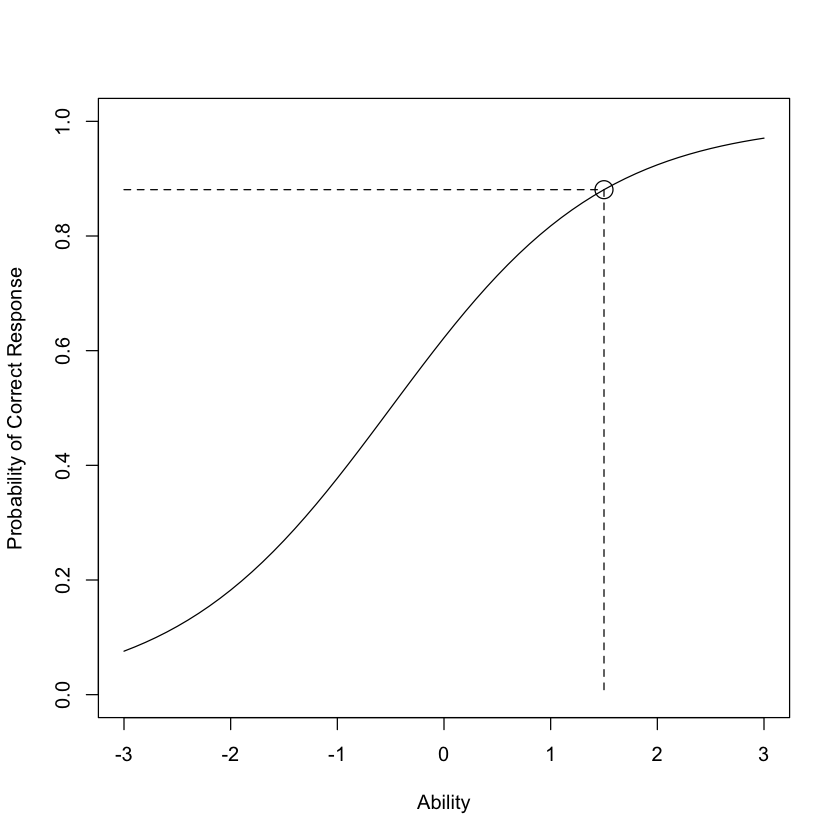

In [10]:
theta_range <- seq(-3, 3, .1)
plot(theta_range, icc(a, b, theta_range),
    type = "l", xlim = c(-3, 3), ylim = c(0, 1),
    xlab = "Ability", ylab = "Probability of Correct Response"
)
points(theta, icc(a, b, theta), cex=2)
segments(-3, icc(a, b, theta), theta, icc(a, b, theta), lty = "dashed")
segments(theta, icc(a, b, theta), theta, 0, lty = "dashed")

## La funzione Logistica

Nel contesto del modello di Rasch, vediamo come la probabilità di dare una risposta corretta all'item $i$ sia direttamente legata alla differenza tra l'abilità del rispondente $ \theta_p $ e la difficoltà dell'item $ \beta_i $. Per dimostrare questo concetto, iniziamo con la funzione logistica di base:

$$ f(x) = \frac{\exp(x)}{1 + \exp(x)}. $$

Ora, sostituendo $ \theta_p - \beta_i $ al posto di $ x $ in questa equazione, otteniamo il Modello di Rasch, che ci permette di calcolare la probabilità di una risposta corretta come:

$$ \text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = f(\theta_p - \beta_i). $$

La funzione logistica trasforma i logit (logaritmo delle quote) in probabilità. Le quote rappresentano la probabilità relativa di una risposta corretta rispetto a una risposta errata. Ad esempio, quote di tre indicano che una risposta corretta è tre volte più probabile di una risposta errata, mentre quote di 1/3 indicano che una risposta corretta è tre volte meno probabile di una risposta errata. Se la probabilità di una risposta corretta è data da $ \pi $, la probabilità di una risposta errata è $ 1-\pi $, e le quote sono $ O = \frac{\pi}{1-\pi} $. Ogni quota $ O $ è associata a un logit $ \log(O) $ e a una probabilità $ \pi $ univoci. 

Questo ci permette di definire il Modello di Rasch utilizzando i logit, come fatto sopra. Per un dato livello di abilità $ \theta_p $ e una difficoltà dell'item $ \beta_i $, possiamo dimostrare che i log-odds sono dati da $ \theta_p - \beta_i $. Questo ci porta alla forma logit del Modello di Rasch:

$$ 
\log \left( \frac{\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)}{\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)} \right) = \theta_p - \beta_i. 
$$

Per dimostrarlo, partiamo dalla definizione delle quote $ O $ nel contesto del Modello di Rasch, dove:

$$ 
\pi = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

Come dimostrato dettagliatamente nella Sezione {numref}`sec-rasch-prob-risp-errata`, possiamo ottenere $ 1 - \pi $ come:

$$ 1 - \pi = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

Sostituendo questi risultati nella definizione delle quote $ O $ e semplificando, otteniamo:

$$ O = \exp(\theta_p - \beta_i). $$

Quindi, possiamo scrivere il logaritmo naturale delle quote come:

$$ \log(O) = \theta_p - \beta_i. $$

Questa equazione dimostra che, nella scala dei logit, la probabilità di fornire una risposta corretta all'item $i$ è direttamente proporzionale alla differenza tra l'abilità del rispondente $ \theta_p $ e la difficoltà dell'item $ \beta_i $. Un aumento della differenza tra $ \theta_p $ e $ \beta_i $ implica una maggiore probabilità di risposta corretta, ovvero $ \text{Pr}(U_{pi} = 1 \mid \theta_p) = 1 $, rispetto alla probabilità di risposta errata. Pertanto, valori elevati sulla scala dei logit indicano una significativa discrepanza a favore dell'abilità del rispondente rispetto alla difficoltà dell'item, aumentando così la probabilità di ottenere una risposta corretta. 

Un ulteriore vantaggio di questa rappresentazione logit è che offre una semplice interpretazione di $ \theta_p - \beta_i $ come il logit della probabilità che il rispondente $p$ dia una risposta corretta all'item $i$. In altre parole, il logit è rappresentato in modo lineare rispetto a $ \theta_p $, con un'intercetta pari a $ -\beta_i $ e una pendenza di uno. Questo aspetto è evidenziato nella figura seguente, che mostra due item $i$ e $j$ con difficoltà $ \beta_i = -1 $ e $ \beta_j = 1 $. È evidente che le linee rappresentative dei logit sono parallele, con la sola differenza che intersecano l'asse y a $ -\beta_i $ per l'item $i$ e a $ -\beta_j $ per l'item $j$. In questa rappresentazione, è immediatamente chiaro che le ICC del Modello di Rasch sono parallele, mentre sulla scala delle probabilità questa caratteristica è evidente solo nella loro sezione centrale (anche se è importante notare che le ICC non si incrociano).

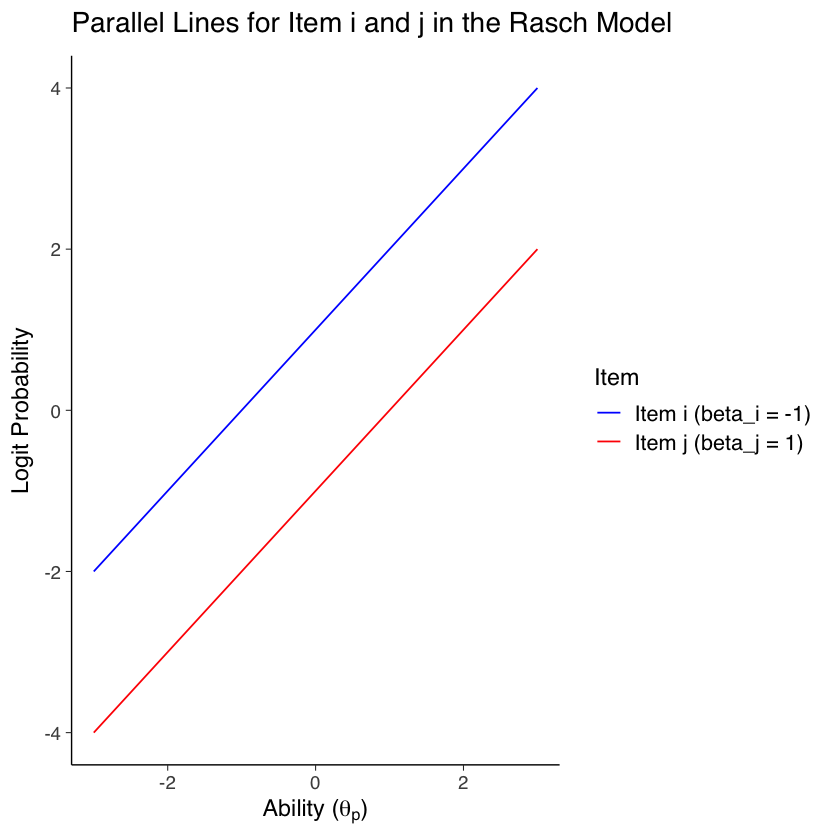

In [5]:
# Creazione di un dataframe con i valori di abilità (theta_p) e le difficoltà degli item (beta)
theta_p <- seq(-3, 3, length.out = 100)
beta_i <- -1
beta_j <- 1

# Calcolo dei logit per gli item i e j
logit_i <- theta_p - beta_i
logit_j <- theta_p - beta_j

data <- data.frame(
    Ability = c(theta_p, theta_p),
    Logit = c(logit_i, logit_j),
    Item = factor(c(rep("Item i (beta_i = -1)", length(theta_p)), rep("Item j (beta_j = 1)", length(theta_p))))
)

ggplot(data, aes(x = Ability, y = Logit, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "red")) +
    ggtitle(TeX("Parallel Lines for Item i and j in the Rasch Model")) +
    xlab(TeX("Ability ($\\theta_p$)")) +
    ylab(TeX("Logit Probability"))

Il fatto che le due linee siano parallele significa che la differenza tra il logit della probabilità di rispondere correttamente all'item $i$ e il logit della probabilità di rispondere correttamente all'item $j$ è la stessa per ogni livello di abilità. Questo è un modo per comprendere l'oggettività specifica, una proprietà importante del Modello di Rasch che discuteremo in seguito.

(sec-rasch-prob-risp-errata)=
## Probabilità di una Risposta Errata

Il modello di Rasch non ammette il credito parziale. Pertanto, $ U_{pi} $ è o zero o uno per ogni persona e item del test, e le probabilità di questi due possibili esiti devono sommarsi a uno, il che significa 

$$ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) + \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1. $$

Risolvendo per $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $, otteniamo

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1 - \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} $$

dopo aver sostituito l'eq. {eq}`eq-rasch-logit` per $ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) $. Possiamo semplificare l'ultima espressione espandendo il 1 per ottenere

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = \frac{1 + \exp(\theta_p - \beta_i) - \exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

## Probabilità di una Risposta Arbitraria

In questa sezione, calcoleremo la probabilità di una risposta arbitraria $\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i)$, che combina espressioni separate per $\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)$ e $\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)$ in un'unica formula. Avere una singola espressione è utile per scrivere le probabilità dei pattern di risposta e delle intere matrici di dati. Per il modello di Rasch, questa espressione è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \frac{\exp\{u_{pi} \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)}, 
$$ (eq-rasch-2-3)

dove rimane aperta la questione se $ u_{pi} $ assumerà il valore zero o uno.

Possiamo verificare che le due equazioni separate per entrambi i casi siano coperte dall'Eq. {eq}`eq-rasch-2-3` sostituendo ciascuno dei due possibili valori di $ u_{pi} $. Quando $ u_{pi} = 1 $, l'espressione si riduce a

$$ \frac{\exp\{1 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}, $$

che è la probabilità di una risposta corretta.

Quando $ u_{pi} = 0 $ si ottiene

$$ 
\frac{\exp\{0 \cdot (\theta_p - \beta_i)\}}{1 + \exp(\theta_p - \beta_i)} = \frac{\exp(0)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}, 
$$

che è la probabilità di una risposta errata, poiché $ \exp(0) = 1 $.

Quindi, l'Eq. {eq}`eq-rasch-2-3` fornisce effettivamente un modo per calcolare la probabilità di entrambi i tipi di risposte (corretta o errata) in base al valore di $ u_{pi} $, rendendola una formula versatile per il modello di Rasch.

In alcune letterature, in particolare nella letteratura relativa all'IRT bayesiana, viene utilizzata un'espressione combinata differente. Questa espressione si basa sulla distribuzione di Bernoulli, così chiamata in onore del matematico svizzero Jacob Bernoulli. La distribuzione di Bernoulli fornisce le probabilità di qualsiasi variabile casuale con due esiti, come le risposte nel modello di Rasch. Ha un singolo parametro, che indica la probabilità che la variabile casuale sia uno. Per il modello di Rasch, questo parametro è

$$ 
\pi_{pi} = \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

Dato $ \pi_{pi} $, la probabilità di risposta $ u_{pi} $ è

$$ 
\text{Pr}(U_{pi} = u_{pi} | \theta_p, \beta_i) = \pi_{pi}^{u_{pi}} \cdot (1 - \pi_{pi})^{1-u_{pi}}. 
$$ (eq-rasch-2-4)

La base del secondo termine, $ 1-\pi_{pi} $, è uguale alla probabilità di una risposta errata $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $. Così, la probabilità di una risposta corretta è elevata alla potenza $ u_{pi} $, mentre la probabilità di una risposta errata è elevata alla potenza $ 1 - u_{pi} $. 

Questa espressione è davvero solo un trucco notazionale che sfrutta il fatto che $ a^0 = 1 $ per qualsiasi $ a $. I termini $ u_{pi} $ e $ 1-u_{pi} $ agiscono come interruttori. Quando $ u_{pi} = 1 $, $ 1-u_{pi} = 0 $, quindi la probabilità di una risposta corretta è attivata mentre la probabilità di una risposta errata è disattivata essendo impostata a uno. Possiamo vedere questo meccanismo nelle equazioni sostituendo 1 per $ u_{pi} $. Questo dà $ \pi_{pi}^{1} \cdot (1-\pi_{pi})^{1-1} = \pi_{pi}^{1} \cdot (1-\pi_{pi})^{0} = \pi_{pi} \cdot 1 = \pi_{pi} $. Impostando $ u_{pi} = 0 $, gli interruttori si invertono: la probabilità di una risposta corretta è disattivata, mentre quella di una risposta errata è attivata. 

Un vantaggio dell'uso dell'eq. {eq}`eq-rasch-2-4` per descrivere il modello di Rasch è che non dipende dalla forma specifica dell'ICC. Nella teoria classica del Modello di Rasch, la Curva Caratteristica dell'Item (ICC) descrive la probabilità di una risposta corretta in funzione dell'abilità del rispondente e della difficoltà dell'item. Questa curva ha una forma specifica determinata dalla formulazione matematica del modello di Rasch. L'eq. {eq}`eq-rasch-2-4`, basata sulla distribuzione di Bernoulli, non è vincolata a una specifica forma dell'ICC del modello di Rasch. In altre parole, questa formulazione è più flessibile e può adattarsi a modelli diversi dal modello di Rasch standard, come il modello 1PNO, pur mantenendo la sua validità. Il modello 1PNO (One-Parameter Normal Ogive) è un altro modello nella teoria della risposta all'item. Anche se ha delle somiglianze con il modello di Rasch, utilizza una formulazione diversa per la probabilità di una risposta corretta. Utilizzando l'equazione Bernoulli (eq. {eq}`eq-rasch-2-4`), è possibile creare un'equazione unificata che può descrivere le probabilità di risposta sia nel modello di Rasch che nel modello 1PNO. Questo viene fatto definendo $ \pi_{pi} $ (la probabilità di successo in un'item per un individuo) secondo la formulazione specifica del modello 1PNO anziché quella del modello di Rasch.

Un secondo vantaggio è che ci permette di usare una scorciatoia statistica per nascondere i suoi dettagli matematici in molte situazioni. Quando vogliamo dire che la variabile casuale $ U_{pi} $ segue una distribuzione di Bernoulli con parametro $ \pi_{pi} $, è comune scrivere $ U_{pi} \sim \text{Bernoulli}(\pi_{pi}) $. Il simbolo "∼" può essere letto come "è distribuito come". In questa notazione, che è comune nell'IRT bayesiano, possiamo scrivere il modello di Rasch come

$$ 
U_{pi} \sim \text{Bernoulli}(\pi_{pi}), \quad \pi_{pi} = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)}. 
$$

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\delta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\delta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro più specifico e dettagliato delle dinamiche che influenzano le risposte agli item.

## Considerazioni Conclusive 

La IRT presenta diversi vantaggi rispetto alla Teoria Classica dei Test:

**Precisione e Dettaglio**: L'IRT analizza le risposte a livello di singolo item attraverso varie funzioni di risposta, offrendo una comprensione dettagliata della performance di ogni domanda. Questa precisione consente di identificare specifiche aree di forza e debolezza all'interno di un test, fornendo intuizioni preziose sui singoli rispondenti e sugli item, e riducendo gli errori di misurazione.

**Separazione tra Attributo della Persona e Caratteristiche dell'Item**: Un vantaggio fondamentale della IRT è la chiara distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). A differenza della Teoria Classica dei Test (CTT), dove la difficoltà degli item può variare in base al gruppo di rispondenti, nella IRT queste difficoltà sono considerate proprietà fisse degli item stessi, rimanendo costanti per tutti i rispondenti. Questa specifica separazione accresce notevolmente la precisione e la flessibilità nel processo di misurazione. Nella IRT, la relazione $\theta_p - b_i$ implica che sia l'abilità della persona che la difficoltà dell'item vengono misurate utilizzando la stessa scala. Questo aspetto permette un confronto diretto e quantitativo tra abilità e difficoltà, facilitando l'analisi e l'interpretazione dei risultati.

**Adattabilità a Diversi Modelli di Risposta**: La flessibilità dell'IRT consente l'analisi di diversi modelli di risposta, adattandosi a vari formati di domanda come domande a scelta multipla, scale Likert e domande aperte. Questa adattabilità garantisce una valutazione completa, catturando le sfumature della cognizione e del comportamento umano.

**Valutazione Individualizzata/Adattiva**: A differenza dei metodi tradizionali, gli errori di misurazione nell'IRT sono una funzione sia del livello dell'attributo della persona sia dei parametri dell'item. Ad esempio, nell'IRT, gli item con difficoltà più vicine al livello dell'attributo della persona forniscono più informazioni sull'attributo rispetto ad altri item. Pertanto, le valutazioni possono essere personalizzate sul livello dell'attributo dei rispondenti per ridurre gli errori di misurazione.

**Analisi Completa degli Item**: L'IRT può essere utilizzata per condurre un'analisi approfondita degli item, valutando parametri come discriminazione dell'item, difficoltà e parametri di indovinamento. Questa analisi dettagliata fornisce informazioni importanti per l'utilizzo e il miglioramento degli item.

Il modello di Rasch (Rasch, 1960, 1966a, b) è il modello più semplice nell'ambito della IRT. Il ,modello di Rasch gode di una vasta diffusione ed è altamente apprezzato da alcuni ricercatori, ma è anche oggetto di critiche da parte di coloro che preferiscono modelli più altamente parametrizzati per l'analisi dei dati di risposta agli item. La ragione alla base di queste divergenti opinioni è che il modello di Rasch può essere derivato da un numero limitato di semplici assunzioni. I sostenitori affermano che tali assunzioni costituiscano una base matematicamente elegante per il modello, mentre gli oppositori sostengono che esse siano piuttosto restrittive.

Nel modello di Rasch, si assume che le probabilità di risposta corretta degli individui a ciascun item siano determinate unicamente da una caratteristica latente, misurata dal modello, e dalla difficoltà dell'item stesso. Nei termini della ICC che abbiamo discusso in questo capitolo, il modello di Rasch assume che le ICC di tutti gli item siano parallele. Come vedremo nei capitoli successivi, questo modello si basa sulla fondamentale assunzione di invarianza, secondo la quale le proprietà degli item e delle persone rimangono costanti indipendentemente dal contesto in cui vengono somministrati.

Mentre alcuni studiosi lodano la semplicità e l'eleganza di queste assunzioni, altri ritengono che esse siano troppo limitanti per catturare la complessità dei dati di risposta agli item in situazioni reali. 